In [2]:
import pandas as pd

dataset_path = 'data/lab1_data.xlsx'
dataset = pd.read_excel(dataset_path)
display(dataset)

,Unnamed: 0,x1,x2,x3,x4,x5,Округ
0,Белгородская область,7 777,14 918,2 825,2 009,1 841,сenter
1,Брянская область,4 560,10 211,1 538,1 418,837,NaN
2,Владимирская область,5 802,8 902,1 703,1 468,NaN,сenter
3,Воронежская область,NaN,17 186,3 362,2 458,4 347,сenter
4,Ивановская область,4 495,5 649,1 338,977,1 288,сenter
...,...,...,...,...,...,...,...
80,Амурская область,2 954,7 211,929,977,829,dv
81,Магаданская область,787,1 215,331,202,97,dv
82,Сахалинская область,3 332,4 511,792,507,131,dv
83,Еврейская автономная область,803,NaN,175,187,57,dv


In [3]:
# solve non-breaking space issue
dataset_copy = dataset.copy()
dataset_copy = dataset_copy.replace(to_replace='\xa0', value='', regex=True)
display(dataset_copy)

,Unnamed: 0,x1,x2,x3,x4,x5,Округ
0,Белгородская область,7777,14918,2825,2009,1841,сenter
1,Брянская область,4560,10211,1538,1418,837,NaN
2,Владимирская область,5802,8902,1703,1468,NaN,сenter
3,Воронежская область,NaN,17186,3362,2458,4347,сenter
4,Ивановская область,4495,5649,1338,977,1288,сenter
...,...,...,...,...,...,...,...
80,Амурская область,2954,7211,929,977,829,dv
81,Магаданская область,787,1215,331,202,97,dv
82,Сахалинская область,3332,4511,792,507,131,dv
83,Еврейская автономная область,803,NaN,175,187,57,dv


In [4]:
# convert objects to int64 and excludes anomaly
categories_of_teachers = ['x1', 'x2', 'x3', 'x4', 'x5']
dataset_copy[categories_of_teachers].convert_dtypes()

for i in categories_of_teachers:
    dataset_copy[i] = pd.to_numeric(dataset_copy[i], errors='coerce')

dataset_copy.head(100)

,Unnamed: 0,x1,x2,x3,x4,x5,Округ
0,Белгородская область,7777.0,14918.0,2825.0,2009.0,1841.0,сenter
1,Брянская область,4560.0,10211.0,1538.0,1418.0,837.0,NaN
2,Владимирская область,5802.0,8902.0,1703.0,1468.0,NaN,сenter
3,Воронежская область,NaN,17186.0,3362.0,2458.0,4347.0,сenter
4,Ивановская область,4495.0,5649.0,1338.0,977.0,1288.0,сenter
...,...,...,...,...,...,...,...
80,Амурская область,2954.0,7211.0,929.0,977.0,829.0,dv
81,Магаданская область,787.0,1215.0,331.0,202.0,97.0,dv
82,Сахалинская область,3332.0,4511.0,792.0,507.0,131.0,dv
83,Еврейская автономная область,803.0,NaN,175.0,187.0,57.0,dv


In [5]:
dataset_copy.describe()

,x1,x2,x3,x4,x5
count,83.000000,84.000000,84.000000,83.000000,83.000000
mean,7333.084337,14787.750000,2519.428571,1811.385542,2169.903614
std,6485.396645,14727.063192,2095.862173,1520.177259,4228.748133
min,292.000000,614.000000,111.000000,36.000000,2.000000
25%,3354.500000,6754.250000,1212.000000,814.000000,641.500000
50%,5562.000000,9825.000000,1798.500000,1384.000000,1169.000000
75%,8434.000000,18761.250000,3161.000000,2378.500000,2404.500000
max,33195.000000,108858.000000,9967.000000,7924.000000,33757.000000


In [6]:
# fill missed values in teachers categories
import miceforest as mf

kds_teachers = mf.ImputationKernel(
    dataset_copy.loc[:, 'x1':'x5'],
    save_all_iterations=True,
    random_state=100)
kds_teachers.mice(iterations=5, n_estimators=50)

dataset_copy.loc[:, 'x1':'x5'] = kds_teachers.complete_data()

dataset_copy.head(100)

,Unnamed: 0,x1,x2,x3,x4,x5,Округ
0,Белгородская область,7777.0,14918.0,2825.0,2009.0,1841.0,сenter
1,Брянская область,4560.0,10211.0,1538.0,1418.0,837.0,NaN
2,Владимирская область,5802.0,8902.0,1703.0,1468.0,320.0,сenter
3,Воронежская область,9292.0,17186.0,3362.0,2458.0,4347.0,сenter
4,Ивановская область,4495.0,5649.0,1338.0,977.0,1288.0,сenter
...,...,...,...,...,...,...,...
80,Амурская область,2954.0,7211.0,929.0,977.0,829.0,dv
81,Магаданская область,787.0,1215.0,331.0,202.0,97.0,dv
82,Сахалинская область,3332.0,4511.0,792.0,507.0,131.0,dv
83,Еврейская автономная область,803.0,3129.0,175.0,187.0,57.0,dv


In [7]:
# fill missed values in location column
from sklearn.impute import SimpleImputer

loc_imp = SimpleImputer(strategy='constant', fill_value='сenter')
dataset_copy = pd.DataFrame(loc_imp.fit_transform(dataset_copy), columns=loc_imp.get_feature_names_out())

dataset_copy.head(100)

,Unnamed: 0,x1,x2,x3,x4,x5,Округ
0,Белгородская область,7777.0,14918.0,2825.0,2009.0,1841.0,сenter
1,Брянская область,4560.0,10211.0,1538.0,1418.0,837.0,сenter
2,Владимирская область,5802.0,8902.0,1703.0,1468.0,320.0,сenter
3,Воронежская область,9292.0,17186.0,3362.0,2458.0,4347.0,сenter
4,Ивановская область,4495.0,5649.0,1338.0,977.0,1288.0,сenter
...,...,...,...,...,...,...,...
80,Амурская область,2954.0,7211.0,929.0,977.0,829.0,dv
81,Магаданская область,787.0,1215.0,331.0,202.0,97.0,dv
82,Сахалинская область,3332.0,4511.0,792.0,507.0,131.0,dv
83,Еврейская автономная область,803.0,3129.0,175.0,187.0,57.0,dv


In [8]:
dataset_copy.describe()

,Unnamed: 0,x1,x2,x3,x4,x5,Округ
count,85,85.0,85.0,85.0,85.0,85.0,85
unique,85,83.0,84.0,84.0,82.0,83.0,8
top,Белгородская область,5802.0,3129.0,961.0,1648.0,320.0,сenter
freq,1,2.0,2.0,2.0,2.0,2.0,18


In [9]:
dataset_copy.loc[:, 'Округ'] = dataset_copy.loc[:, 'Округ'].replace(
    ['сenter', 'nw', 'south', 'caucasus', 'volga', 'ural', 'siberia', 'dv'],
    [1., 2., 3., 4., 5., 6., 7., 8.])

dataset_copy = dataset_copy.rename(columns={'Округ': 'location'})

dataset_copy.head(100)

,Unnamed: 0,x1,x2,x3,x4,x5,location
0,Белгородская область,7777.0,14918.0,2825.0,2009.0,1841.0,1.0
1,Брянская область,4560.0,10211.0,1538.0,1418.0,837.0,1.0
2,Владимирская область,5802.0,8902.0,1703.0,1468.0,320.0,1.0
3,Воронежская область,9292.0,17186.0,3362.0,2458.0,4347.0,1.0
4,Ивановская область,4495.0,5649.0,1338.0,977.0,1288.0,1.0
...,...,...,...,...,...,...,...
80,Амурская область,2954.0,7211.0,929.0,977.0,829.0,8.0
81,Магаданская область,787.0,1215.0,331.0,202.0,97.0,8.0
82,Сахалинская область,3332.0,4511.0,792.0,507.0,131.0,8.0
83,Еврейская автономная область,803.0,3129.0,175.0,187.0,57.0,8.0


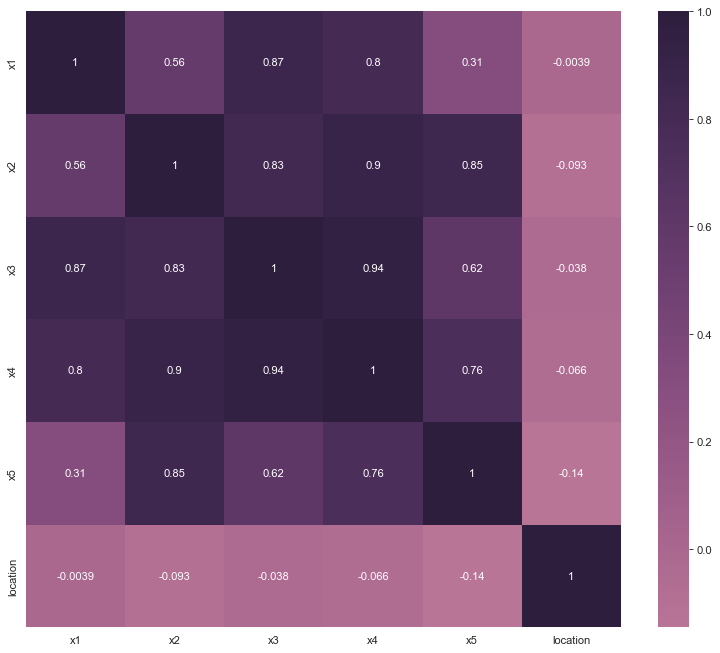

In [10]:
# create correlogram
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10), dpi=80)
sns.heatmap(dataset_copy.loc[:, 'x1':'location'].corr(), xticklabels=dataset_copy.loc[:, 'x1':'location'].corr().columns,
            cmap=sns.cubehelix_palette(as_cmap=True), center=0, annot=True)
plt.show()

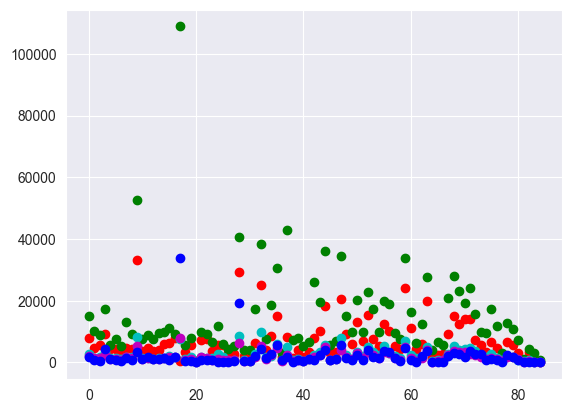

In [11]:
plt.plot(dataset_copy.loc[:, 'x1'], 'ro')
plt.plot(dataset_copy.loc[:, 'x2'], 'go')
plt.plot(dataset_copy.loc[:, 'x3'], 'co')
plt.plot(dataset_copy.loc[:, 'x4'], 'mo')
plt.plot(dataset_copy.loc[:, 'x5'], 'bo')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1a68ffe53d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a68ffe6d10>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1a68ffd6650>],
 'medians': [<matplotlib.lines.Line2D at 0x1a68fff4390>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a68de31f50>],
 'means': []}

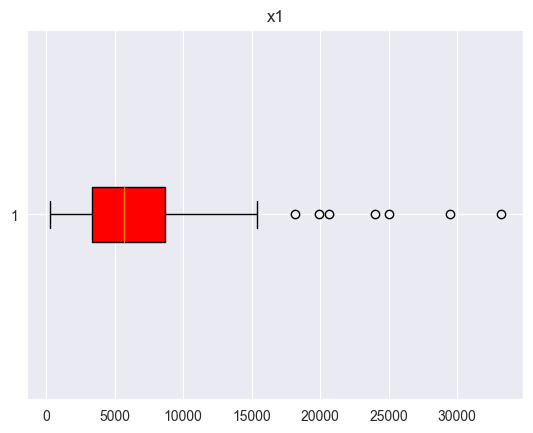

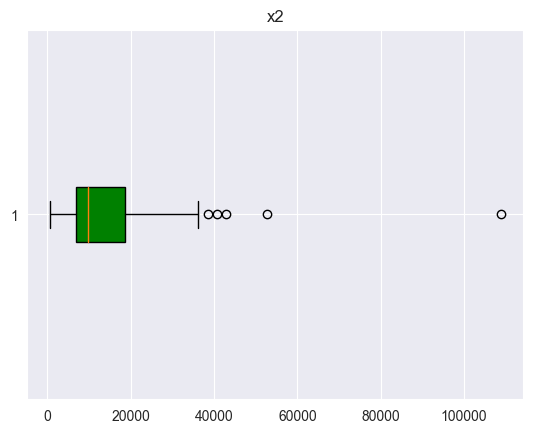

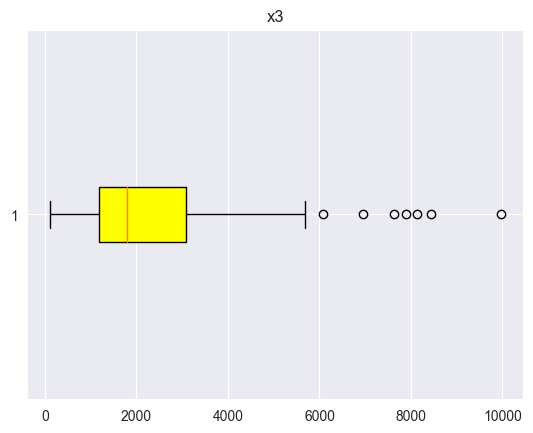

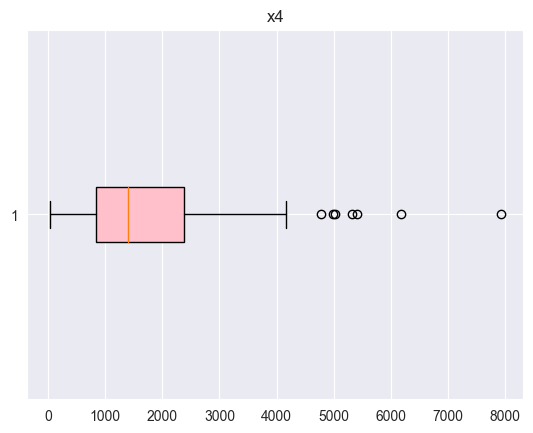

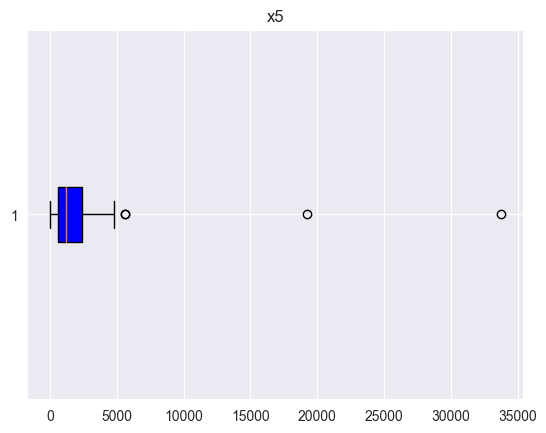

In [12]:
fig, ax = plt.subplots()
ax.set_title('x1')
ax.boxplot(dataset_copy.loc[:, 'x1'],
           vert=False,
           patch_artist = True,
           boxprops=dict(facecolor='red'))

fig, ax = plt.subplots()
ax.set_title('x2')
ax.boxplot(dataset_copy.loc[:, 'x2'],
           vert=False,
           patch_artist = True,
           boxprops=dict(facecolor='green'))

fig, ax = plt.subplots()
ax.set_title('x3')
ax.boxplot(dataset_copy.loc[:, 'x3'],
           vert=False,
           patch_artist = True,
           boxprops=dict(facecolor='yellow'))

fig, ax = plt.subplots()
ax.set_title('x4')
ax.boxplot(dataset_copy.loc[:, 'x4'],
           vert=False,
           patch_artist = True,
           boxprops=dict(facecolor='pink'))

fig, ax = plt.subplots()
ax.set_title('x5')
ax.boxplot(dataset_copy.loc[:, 'x5'],
           vert=False,
           patch_artist = True,
           boxprops=dict(facecolor='blue'))

In [13]:
# use IsolationForest for solving outlier issue
from sklearn.ensemble import IsolationForest

iso = IsolationForest()
outliers = iso.fit_predict(dataset_copy.loc[:, 'x1':'x5'])

In [14]:
for i in range(len(outliers)):
    if outliers[i] == -1:
        dataset_copy.drop(i, inplace = True)

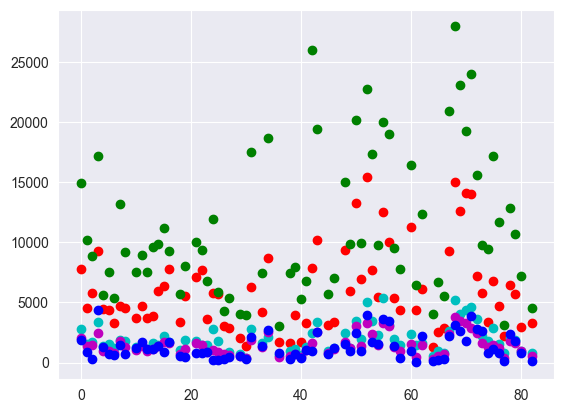

In [15]:
plt.plot(dataset_copy.loc[:, 'x1'], 'ro')
plt.plot(dataset_copy.loc[:, 'x2'], 'go')
plt.plot(dataset_copy.loc[:, 'x3'], 'co')
plt.plot(dataset_copy.loc[:, 'x4'], 'mo')
plt.plot(dataset_copy.loc[:, 'x5'], 'bo')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1a691735f50>,
 'caps': [<matplotlib.lines.Line2D at 0x1a691737350>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1a6914699d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a691748690>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a6914d71d0>],
 'means': []}

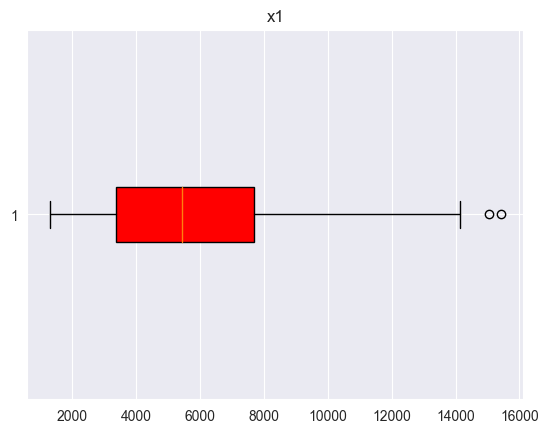

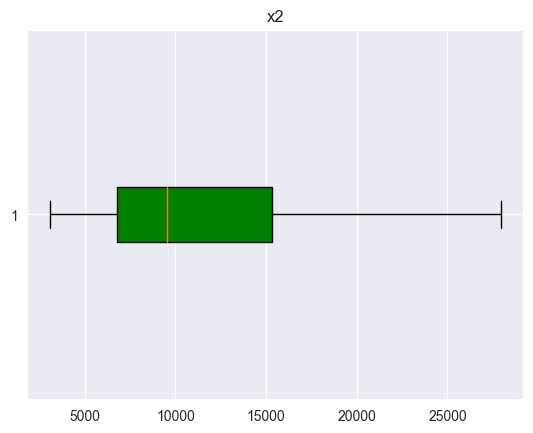

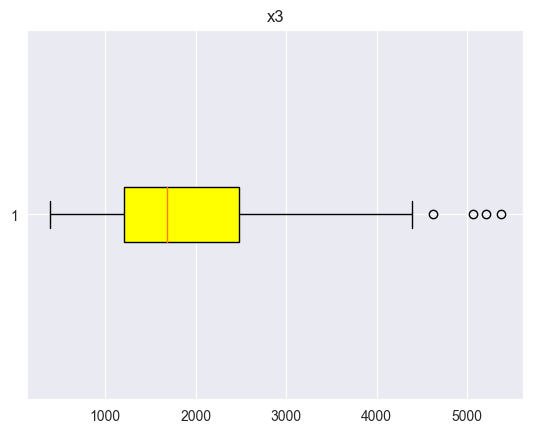

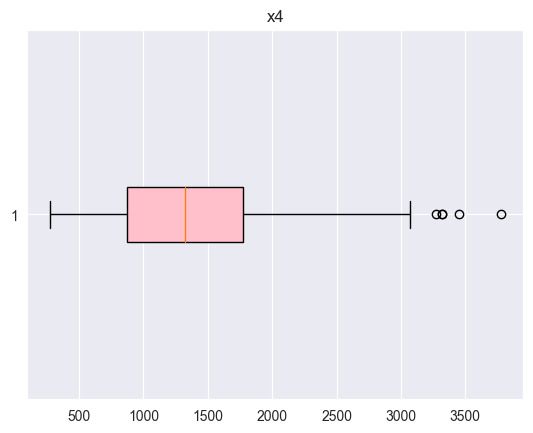

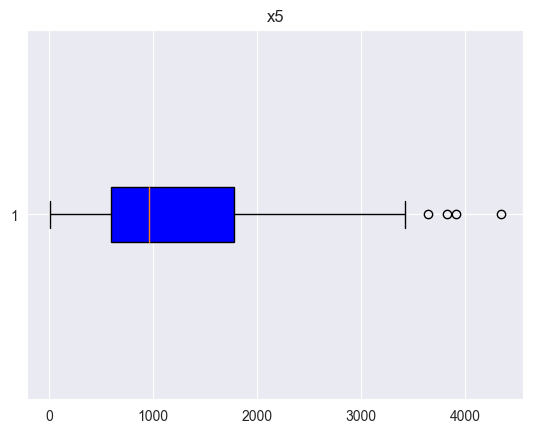

In [16]:
fig, ax = plt.subplots()
ax.set_title('x1')
ax.boxplot(dataset_copy.loc[:, 'x1'],
           vert=False,
           patch_artist = True,
           boxprops=dict(facecolor='red'))

fig, ax = plt.subplots()
ax.set_title('x2')
ax.boxplot(dataset_copy.loc[:, 'x2'],
           vert=False,
           patch_artist = True,
           boxprops=dict(facecolor='green'))

fig, ax = plt.subplots()
ax.set_title('x3')
ax.boxplot(dataset_copy.loc[:, 'x3'],
           vert=False,
           patch_artist = True,
           boxprops=dict(facecolor='yellow'))

fig, ax = plt.subplots()
ax.set_title('x4')
ax.boxplot(dataset_copy.loc[:, 'x4'],
           vert=False,
           patch_artist = True,
           boxprops=dict(facecolor='pink'))

fig, ax = plt.subplots()
ax.set_title('x5')
ax.boxplot(dataset_copy.loc[:, 'x5'],
           vert=False,
           patch_artist = True,
           boxprops=dict(facecolor='blue'))

In [17]:
dataset_copy = dataset_copy.rename(columns={'location': 'Округ'})

dataset_copy.loc[:, 'Округ'] = dataset_copy.loc[:, 'Округ'].replace(
    [1., 2., 3., 4., 5., 6., 7., 8.],
    ['сenter', 'nw', 'south', 'caucasus', 'volga', 'ural', 'siberia', 'dv'])

dataset_copy.head(100)

,Unnamed: 0,x1,x2,x3,x4,x5,Округ
0,Белгородская область,7777.0,14918.0,2825.0,2009.0,1841.0,сenter
1,Брянская область,4560.0,10211.0,1538.0,1418.0,837.0,сenter
2,Владимирская область,5802.0,8902.0,1703.0,1468.0,320.0,сenter
3,Воронежская область,9292.0,17186.0,3362.0,2458.0,4347.0,сenter
4,Ивановская область,4495.0,5649.0,1338.0,977.0,1288.0,сenter
...,...,...,...,...,...,...,...
77,Камчатский край,2202.0,3129.0,783.0,341.0,132.0,dv
78,Приморский край,6485.0,12822.0,2049.0,1812.0,2380.0,dv
79,Хабаровский край,5689.0,10688.0,1877.0,1648.0,1800.0,dv
80,Амурская область,2954.0,7211.0,929.0,977.0,829.0,dv


In [18]:
dataset_copy.describe()

,Unnamed: 0,x1,x2,x3,x4,x5,Округ
count,71,71.0,71.0,71.0,71.0,71.0,71
unique,71,69.0,71.0,70.0,68.0,70.0,8
top,Белгородская область,5802.0,14918.0,961.0,3318.0,320.0,сenter
freq,1,2.0,1.0,2.0,2.0,2.0,16


In [19]:
dataset_copy.to_excel('data/output.xlsx', index=False)